In [11]:
# 1 Загрузити датасет, що містить інформацію про відвідуваність музеїв в різні роки. 
import pandas as pd
data = pd.read_csv("museum_visitors.csv")

In [12]:
# 2 Вивести перші 5 рядків датасету. 
print(data.head())

         Date  Avila Adobe  Firehouse Museum  Chinese American Museum  \
0  2014-01-01        24778              4486                     1581   
1  2014-02-01        18976              4172                     1785   
2  2014-03-01        25231              7082                     3229   
3  2014-04-01        26989              6756                     2129   
4  2014-05-01        36883             10858                     3676   

   America Tropical Interpretive Center  
0                                  6602  
1                                  5029  
2                                  8129  
3                                  2824  
4                                 10694  


In [13]:
# 3 Провести попередній аналіз даних (визначити розмір датасету, тип даних, кількість пропусків). 
print("Розмір таблиці:\n", data.shape, "\n")
print("Пропуски:\n", data.isnull().sum(), "\n")
print("Типи стовпців:\n", data.dtypes, "\n")

Розмір таблиці:
 (59, 5) 

Пропуски:
 Date                                    0
Avila Adobe                             0
Firehouse Museum                        0
Chinese American Museum                 0
America Tropical Interpretive Center    0
dtype: int64 

Типи стовпців:
 Date                                    object
Avila Adobe                              int64
Firehouse Museum                         int64
Chinese American Museum                  int64
America Tropical Interpretive Center     int64
dtype: object 



In [16]:
# 4 Перевірити наявність дублікатів. Якщо є, видалити їх і вивести розмір таблиці (без дублікатів). 
print("Дублікати:\n", data.duplicated().sum())
data = data.drop_duplicates()
print("Розмір таблиці після видалення:\n", data.shape, "\n")

Дублікати:
 0
Розмір таблиці після видалення:
 (59, 5) 



In [98]:
# 5 Про які роки містить інформацію датасет. 
data["date"] = pd.to_datetime(data['date'])
data["Year"] = data["date"].dt.year
print("Роки в датасеті: \n", data["Year"].unique())

Роки в датасеті: 
 [2014 2015 2016 2017 2018]


In [33]:
# 6 Змінити назви столбців. Замінити великі букви на маленьки, пробіли на підкреслення
data.columns = data.columns.str.lower().str.replace(' ', '_')
data.columns

Index(['date', 'avila_adobe', 'firehouse_museum', 'chinese_american_museum',
       'america_tropical_interpretive_center', 'data', 'year'],
      dtype='object')

In [71]:
# 7 Обчислити середню кількість відвідувачів для кожного музею протягом всього періоду. 
museum = ["avila_adobe", "firehouse_museum", "chinese_american_museum", "america_tropical_interpretive_center"]
print("Середня к-сть відвідувачів для кожного музею:\n", data[museum].mean().round(2))

Середня к-сть відвідувачів для кожного музею:
 avila_adobe                             24061.66
firehouse_museum                         6472.83
chinese_american_museum                  2721.25
america_tropical_interpretive_center     7107.02
dtype: float64


In [104]:
# 8 Знайти мінімальну та максимальну кількість відвідувачів для кожного музею за 2018 рік 
data_2018 = data[(data["date"].dt.year == 2018)]
museum = ["avila_adobe", "firehouse_museum", "chinese_american_museum", "america_tropical_interpretive_center"]
print("Мінімальна к-сть відвідувачів за 2018 рік:\n", data_2018[museum].min())
print("Максимальна к-сть відвідувачів за 2018 рік:\n", data_2018[museum].max())

Мінімальна к-сть відвідувачів за 2018 рік:
 avila_adobe                             14718
firehouse_museum                         3306
chinese_american_museum                  2146
america_tropical_interpretive_center     3180
dtype: int64
Максимальна к-сть відвідувачів за 2018 рік:
 avila_adobe                             25173
firehouse_museum                         8013
chinese_american_museum                  4960
america_tropical_interpretive_center     5837
dtype: int64


In [103]:
# 9 Визначити місяці з найвищою і найнижчою загальною кількістю відвідувачів серед усіх музеїв для 2015 року. Вивести назви місяців (не цифри). 
data["date"] = pd.to_datetime(data["date"])
data["Month"] = data["date"].dt.month
data_2015 = data[data['date'].dt.year == 2015]
month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
    7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
}
max = data_2015.groupby(data_2015["date"].dt.month)[museum].sum().idxmax()
min = data_2015.groupby(data_2015["date"].dt.month)[museum].sum().idxmin()
print("Місяць з найвищою загальною к-стю відвідувачів у 2015 році: ", month_names[max])
print("Місяць з найнижчою загальною к-стю відвідувачів у 2015 році: ", month_names[min])

Місяць з найвищою загальною к-стю відвідувачів у 2015 році:  May
Місяць з найнижчою загальною к-стю відвідувачів у 2015 році:  February


In [109]:
# 10 Порівняти кількість відвідувачів музею "Avila Adobe" у літні і зимові місяці 2018 року 
summer_months = [6, 7, 8] 
winter_months = [12, 1, 2]  
summer_vis = data_2018[data_2018['date'].dt.month.isin(summer_months)]["avila_adobe"].sum()
winter_vis = data_2018[data_2018['date'].dt.month.isin(winter_months)]["avila_adobe"].sum()
print("К-сть відвідувачів музею 'Avila Adobe' у літні місяці:", summer_vis)
print("К-сть відвідувачів музею 'Avila Adobe' у зимові місяці:", winter_vis)

К-сть відвідувачів музею 'Avila Adobe' у літні місяці: 66122
К-сть відвідувачів музею 'Avila Adobe' у зимові місяці: 30983


In [111]:
# 11 Знайти кореляцію між кількістю відвідувачів в кожному з музеїв  та датами у 2016 році 
data_2016 = data[data["date"].dt.year == 2016]
print("Матриця кореляції:\n", data_2016[museum].corr())

Матриця кореляції:
                                       avila_adobe  firehouse_museum  \
avila_adobe                              1.000000          0.737200   
firehouse_museum                         0.737200          1.000000   
chinese_american_museum                  0.089054          0.553935   
america_tropical_interpretive_center     0.436561          0.247389   

                                      chinese_american_museum  \
avila_adobe                                          0.089054   
firehouse_museum                                     0.553935   
chinese_american_museum                              1.000000   
america_tropical_interpretive_center                 0.443800   

                                      america_tropical_interpretive_center  
avila_adobe                                                       0.436561  
firehouse_museum                                                  0.247389  
chinese_american_museum                                           0

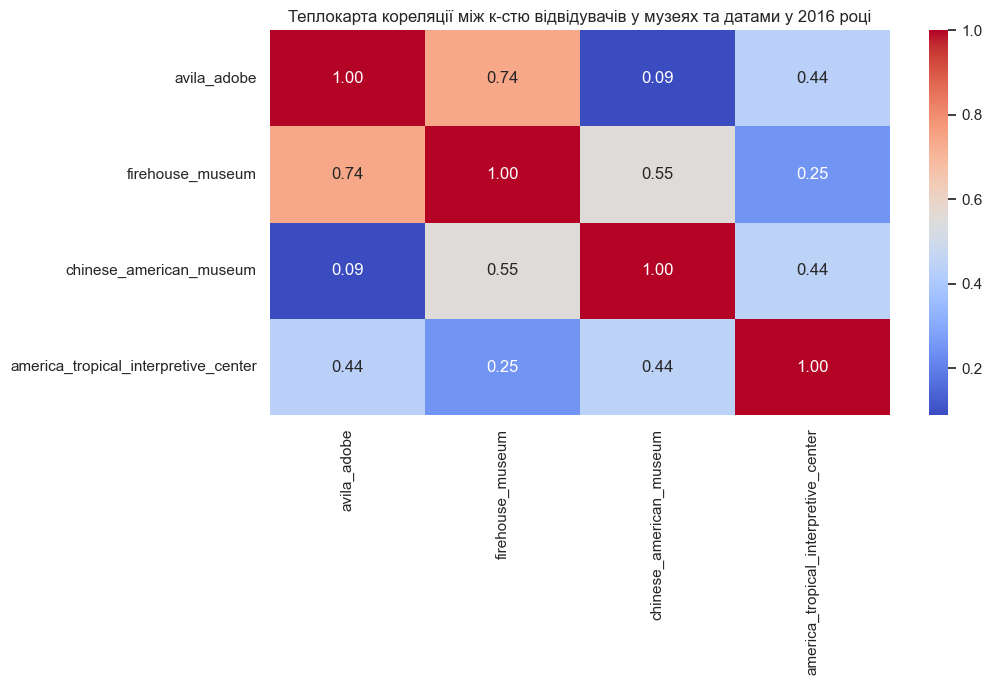

In [134]:
# 12 Побудувати теплокарту кореляції для попереднього завдання. 
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = data_2016[museum].corr()
plt.figure(figsize=(10, 5))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Теплокарта кореляції між к-стю відвідувачів у музеях та датами у 2016 році")
plt.show()

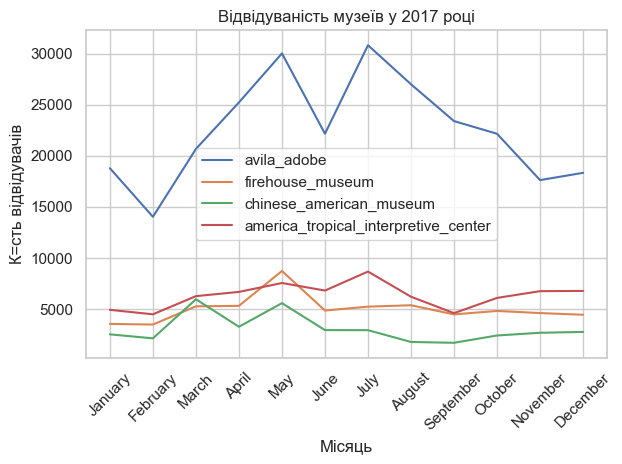

In [133]:
# 13 Побудувати графік ліній для кожного музею, показуючи їхню відвідуваність протягом 2017 року.
data_2017 = data[data["date"].dt.year == 2017]
museums_vis = data_2017.groupby(data_2017["date"].dt.month)[museum].sum()# Починаємо з другого стовпця, оскільки перший - це дата
plt.plot(museums_vis.index, museums_vis[museum], label=museum)
plt.xlabel("Місяць")
plt.ylabel("К=сть відвідувачів")
plt.title("Відвідуваність музеїв у 2017 році")
plt.xticks(range(1, 13), ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

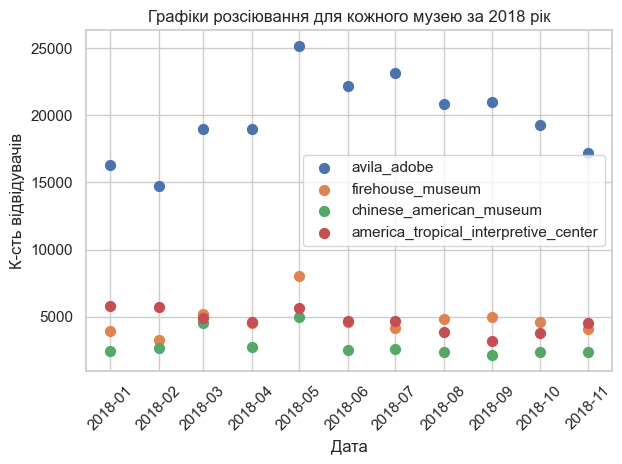

In [135]:
# 14 Побудувати графіки розсіювання для кожного музею за 2018 рік 
for i in museum:
    plt.scatter(data_2018['date'], data_2018[i], label=i, s=50)
plt.xlabel("Дата")
plt.ylabel("К-сть відвідувачів")
plt.title("Графіки розсіювання для кожного музею за 2018 рік")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

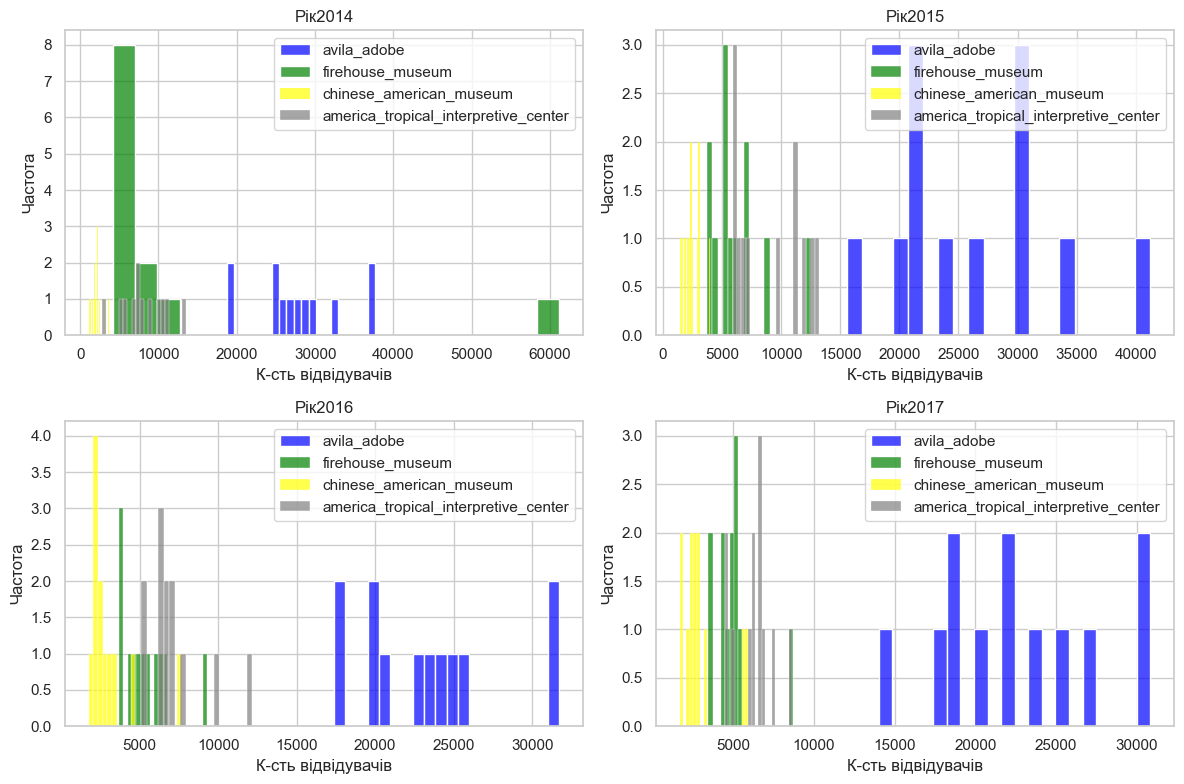

In [147]:
# 15 Гістограма відвідуваності за місяцями кожного музею. Вивести 4 графіки: за 2014, 2015, 2016, 2017 роки. Графіки розташовані два зверху, два знизу, колір першого графіка - синій, другого зелений, третього жовтий, четвертого сірий. 
data_2014 = data[data["date"].dt.year == 2014]
data_2015 = data[data["date"].dt.year == 2015]
data_2016 = data[data["date"].dt.year == 2016]
data_2017 = data[data["date"].dt.year == 2017]
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
colors = ['blue', 'green', 'yellow', 'grey']
years = [data_2014, data_2015, data_2016, data_2017]

for i, year_data in enumerate(years):
    row = i // 2
    col = i % 2
    ax = axes[row, col]    
    for j, i in enumerate(museum):
        sns.histplot(year_data, x=i, bins=20, ax=ax, color=colors[j], alpha=0.7, label=i)    
    ax.set_title("Рік" + str(year_data["date"].dt.year.unique()[0]))
    ax.set_xlabel("К-сть відвідувачів")
    ax.set_ylabel("Частота")
    ax.legend()

plt.tight_layout()
plt.show()